In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [7]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [61]:
df.drop(columns='time',inplace=True)

In [63]:
df.head(7)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1


# Linear Regression Model- Dependent and independent variable

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [17]:
log=LogisticRegression()
log.fit(x_train,y_train)
prediction=log.predict(x_test)
score=log.score(x_train,y_train)
print(score)
accuracy=accuracy_score(y_test,prediction)
print(accuracy)




0.8475836431226765
0.7333333333333333


# Data Analysis

# Comparison between the sodium level in the blood of smokers and non-smokers.

<Axes: xlabel='smoking', ylabel='serum_sodium'>

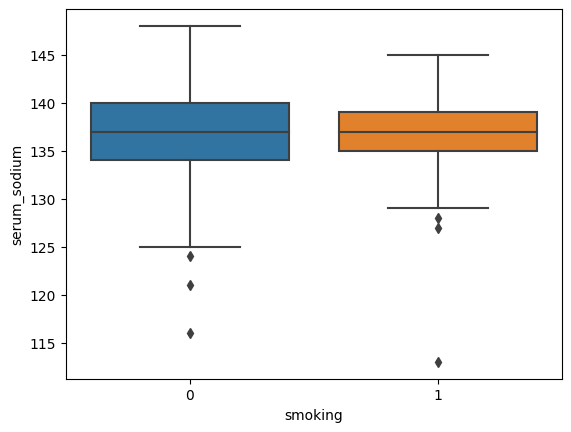

In [73]:
sns.boxplot(data=df, x = 'smoking', y='serum_sodium')

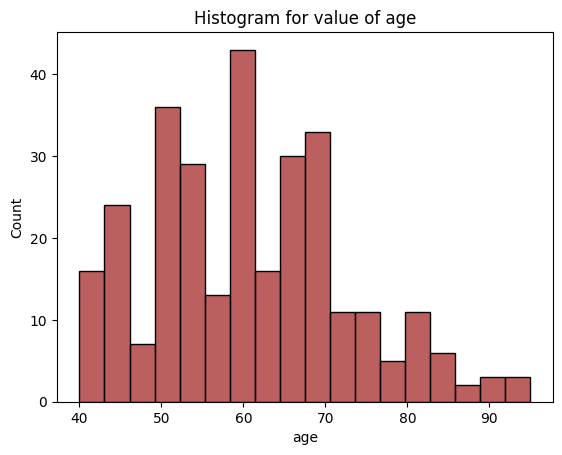

In [64]:
import seaborn as sns
sns.histplot(df['age'], bins=18, color='brown', kde=False)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Histogram for value of age')
plt.show()

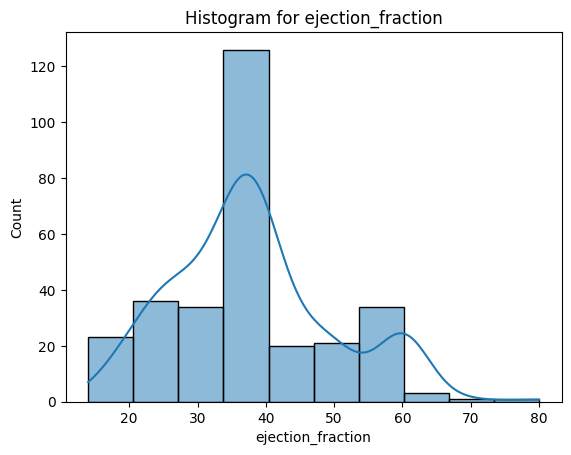

In [77]:
sns.histplot(df['ejection_fraction'], bins = 10, kde = True)
plt.title("Histogram for ejection_fraction")
plt.show()

# Stacked bar Chart for death event by diabetes values

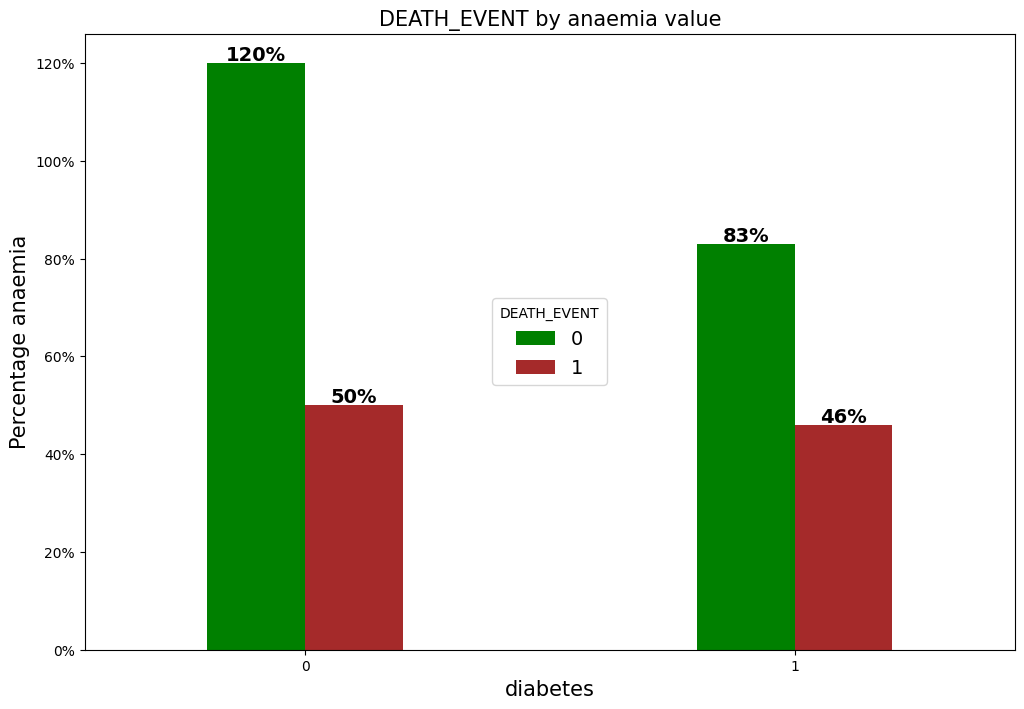

In [38]:
import matplotlib.ticker as mtick
colors = ['green', 'brown']
Diabetes_label = df.groupby(['anaemia', 'DEATH_EVENT']).size().unstack()
ax = Diabetes_label.plot(kind='bar', width=0.4, rot=0, figsize=(12, 8), color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='DEATH_EVENT')
ax.set_ylabel('Percentage anaemia', fontsize=15)
ax.set_xlabel('diabetes', fontsize=15)
ax.set_title('DEATH_EVENT by anaemia value', fontsize=15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (x + width / 2, y + height + 0.5),
                ha='center', color='black', weight='bold', size=14)

plt.show()


# Heat Map of features

Text(0.5, 1.0, 'Correlation Heatmap')

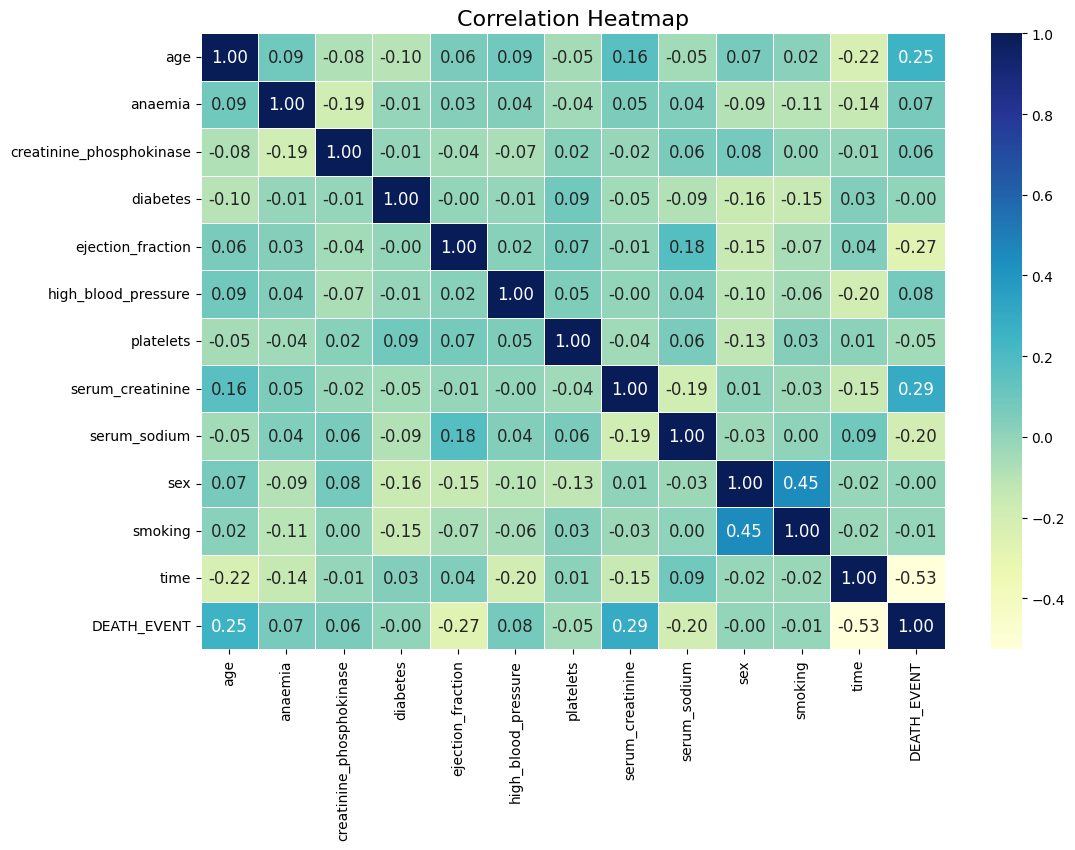

In [39]:
corr = df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr,
            xticklabels=corr.columns,
            linewidth=0.5,
            yticklabels=corr.columns,
            cmap="YlGnBu",
            annot=True,
            fmt=".2f",
            annot_kws={"size": 12})

plt.title('Correlation Heatmap', fontsize=16)

# Scatter plot of ejection_fraction with creatinine_phosphokinase

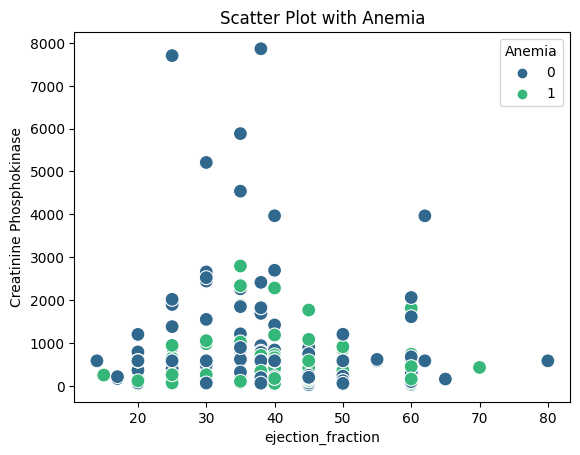

In [56]:
sns.scatterplot(x='ejection_fraction', y='creatinine_phosphokinase', hue='anaemia', data=df, palette='viridis', s=100)

# Set labels and title
plt.xlabel('ejection_fraction')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Scatter Plot with Anemia')

# Show the legend
plt.legend(title='Anemia')

# Show the plot
plt.show()

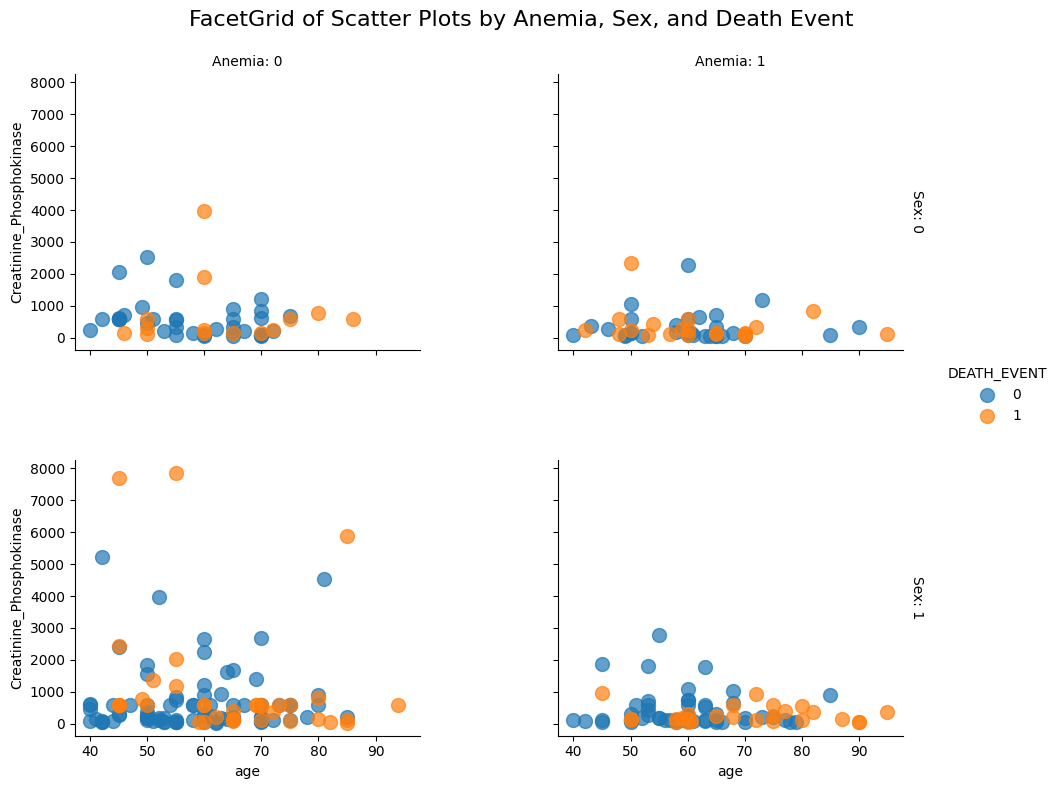

In [72]:
g = sns.FacetGrid(df, col='anaemia', row='sex', hue='DEATH_EVENT', height=4, aspect=1.2, margin_titles=True)
g.map(plt.scatter, 'age', 'creatinine_phosphokinase', alpha=0.7, s=100)
g.add_legend()

# Set titles and labels
g.set_axis_labels('age','Creatinine_Phosphokinase')
g.set_titles(col_template='Anemia: {col_name}', row_template='Sex: {row_name}')

# Adjust the layout
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
g.fig.suptitle('FacetGrid of Scatter Plots by Anemia, Sex, and Death Event', fontsize=16)

# Show the plot
plt.show()